### Simplex Recap

Pitch profiles represents relative importance of the pitch classes for certain key.
Absolute values just doesn't matter, it's reasonable to normalize them.
The same is applied to chroma vectors (as we believe it somehow represents pitch profile).

$\it{l_1}$ normalization is prefered (to $\it{l_2}$ and $\it{l_\infty}$). Because resulting structure: simplex
is simplest in certain sense and have the most developed mathematical instruments ($\it{l_2}$ gives spherical sector and  $\it{l_\infty}$ gives *part* of the cube. Both of them are not even compact).

So, let's consider $l_1$ normalized chroma vector x:
$$ \sum_{i=0}^{11}x_i=1, x_i>0 $$

All possible values of such vector forms standard simplex (https://en.wikipedia.org/wiki/Simplex): 
$$\{x\in \mathbb {R} ^{12}:x_{0}+\dots +x_{11}=1,x_{i}\geq 0,i=0,\dots ,11\}$$

### How it does look like?

#### 1-simplex: line segment

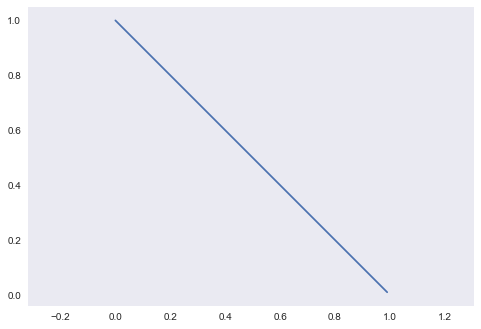

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 1.0, 0.01)
s = 1 - t
fig, ax = plt.subplots()
ax.plot(t, s)
ax.grid()
plt.axis('equal')

plt.show()

#### 2-simplex: triangle

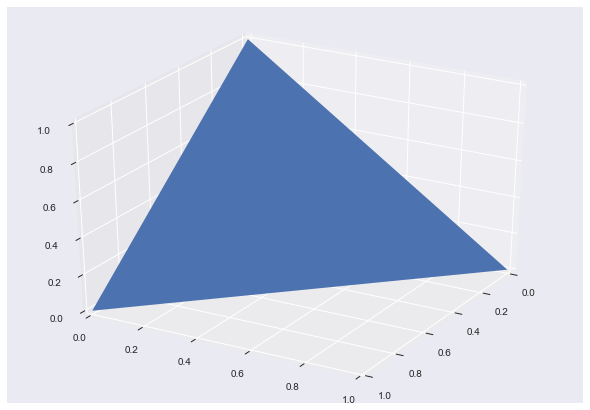

In [76]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
vtx = [[1,0,0], [0,1,0], [0,0,1]]
ax.view_init(30, 30)
ax.add_collection3d(Poly3DCollection([vtx]))
pl.show()

#### 3-simplex: tertahedron
<img src="simplex3.png">
#### 4-simplex: 5-cell
<img src="simplex4.png">
(from wikipedia)


#### 11-simplex

It has 220 triangle sides.
At least we could visualize these sides.

### Ternary plot

Each triangle "side" represents distribution of the compostion of three particular
chroma components. All other 9 components are marginalized out.

Resulting picture is called "Ternary plot":
<img src="ternary.png">

(from "Fundamental Concepts of Compositional Data Analysis": https://www.google.es/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjgosn1zOfXAhWBFRQKHXAFBfEQFggtMAA&url=http%3A%2F%2Fwww.springer.com%2Fcda%2Fcontent%2Fdocument%2Fcda_downloaddocument%2F9783642368080-c1.pdf%3FSGWID%3D0-0-45-1397418-p174963711&usg=AOvVaw3wYiUfdIepZbYEJfWN--SJ):




### Some chroma visualization examples

#### Major chord degrees on the whole dataset

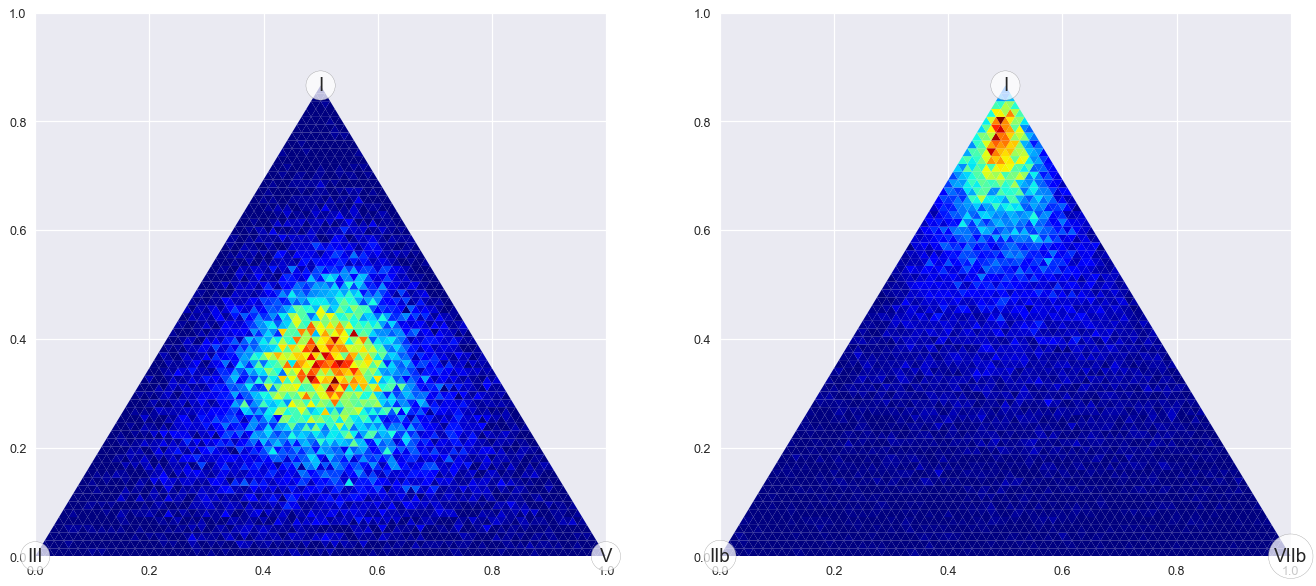

In [51]:
import plots
import lowLevelFeatures as ll
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from plots import degrees
import os

os.chdir(os.environ['JAZZ_HARMONY_DATA_ROOT'] + "/JazzHarmonyCorpus")

cep = ll.ChromaEvaluationParameters(stepSize=2048, smoothingTime=1.2)
chromaEvaluator = ll.AnnotatedChromaEvaluator(cep)
chromas = chromaEvaluator.loadChromasForAnnotationFileList('ready.txt')
dMaj = pd.DataFrame(data=preprocessing.normalize(chromas.chromas[chromas.kinds == 'maj'], norm='l1'),  columns=degrees)
#g = sns.jointplot('VI', 'VII', dMaj, kind="kde")
maj = preprocessing.normalize(chromas.chromas[chromas.kinds == 'maj'], norm='l1')
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8), dpi= 90, facecolor='w', edgecolor='k')

ax[0].set_title("")
#ax[0].axis('equal')
plots.degreesTernaryPlot(ax[0], maj, 'I', 'III', 'V', 60)
plots.plotLabels(ax[0], ['I', 'III', 'V'])
ax[1].set_title("")
#ax[1].axis('equal')
plots.degreesTernaryPlot(ax[1], maj, 'I', 'IIb', 'VIIb', 60)
plots.plotLabels(ax[1], ['I', 'IIb', 'VIIb'])

plt.show()

### Hexagram
We could combine several triangles in one plot to show more wide picture.

#### Different chord patterns for "toy" guitar chord dataset

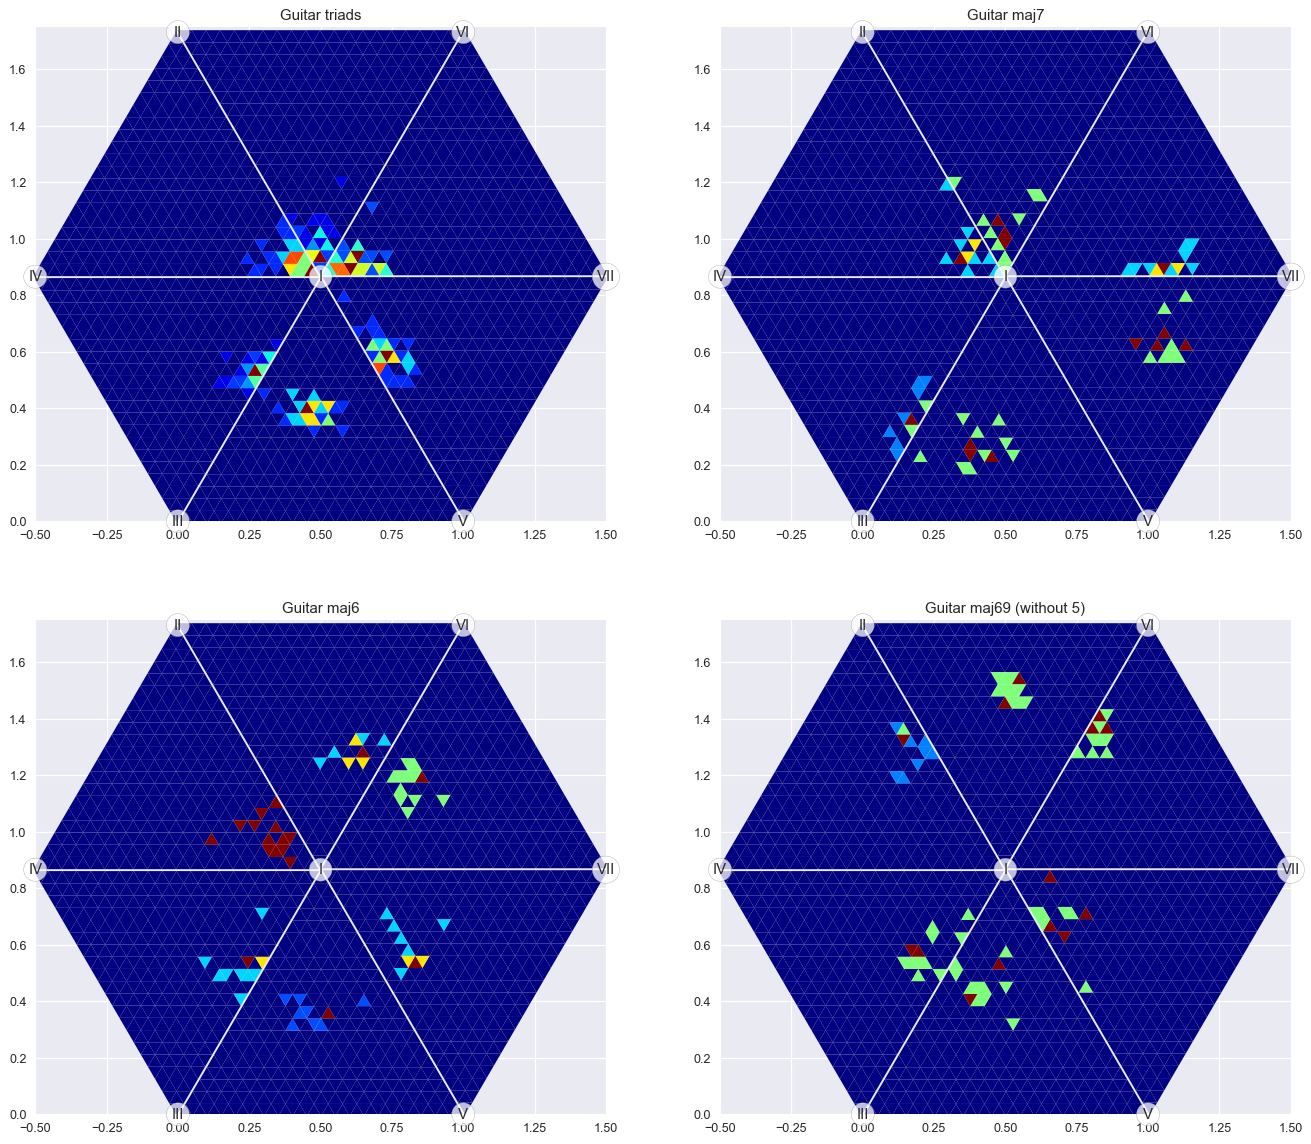

In [54]:
import re
guitar = chromaEvaluator.loadChromasForAnnotationFileList('guitar.txt')
triads = guitar.chromas[[re.match('^[ABCDEFG][b#]?$', x) != None for x in guitar.labels]]
maj7 = guitar.chromas[[re.match('[ABCDEFG][b#]?:maj7', x) != None for x in guitar.labels]]
maj6 = guitar.chromas[[re.match('[ABCDEFG][b#]?:maj6', x) != None for x in guitar.labels]]
g69 = guitar.chromas[[re.match('[ABCDEFG][b#]?:\(3,6,9\)', x) != None for x in guitar.labels]]

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(18, 16), dpi= 90, facecolor='w', edgecolor='k')
ax[0, 0].set_title("Guitar triads")
plots.plotHexagram(ax[0, 0], triads, step=20)

ax[0, 1].set_title("Guitar maj7")
plots.plotHexagram(ax[0, 1], maj7, step=20)

ax[1, 0].set_title("Guitar maj6")
plots.plotHexagram(ax[1, 0], maj6, step=20)

ax[1,1].set_title("Guitar maj69 (without 5)")
plots.plotHexagram(ax[1,1], g69, step=20)

plt.show()

### Style-related patterns (three versions of song Dinah).

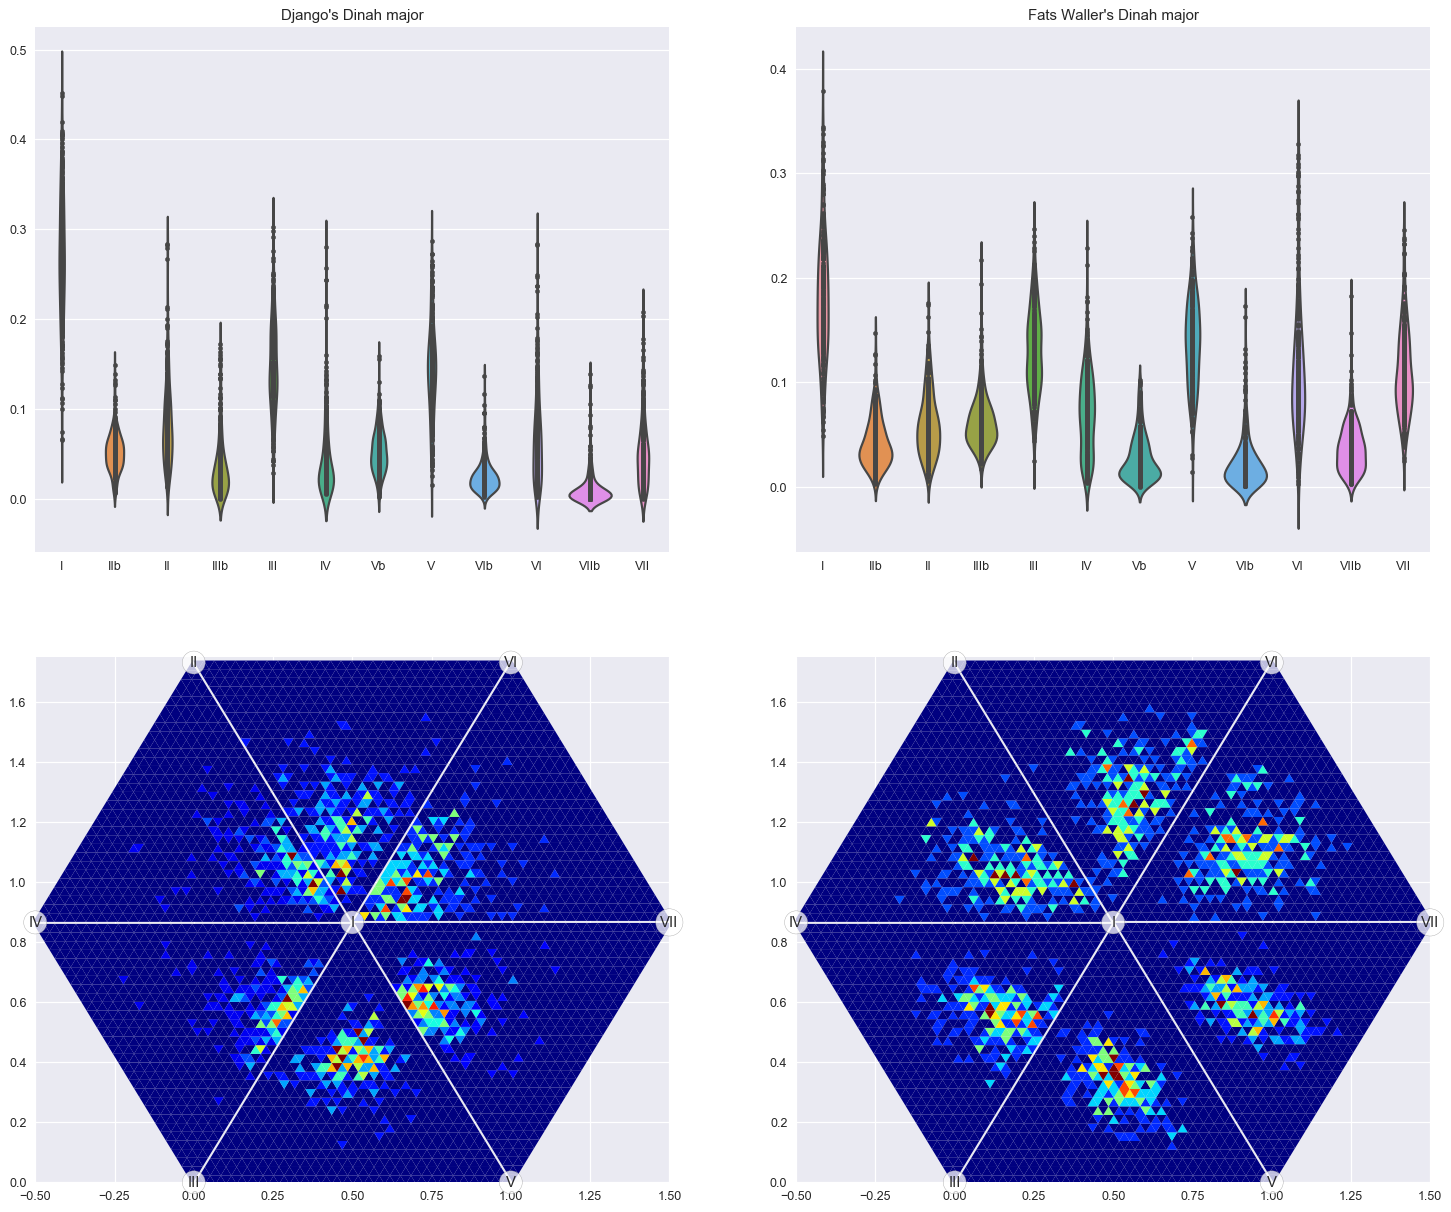

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20, 17), dpi= 90, facecolor='w', edgecolor='k')
django = chromaEvaluator.loadChromasForAnnotationFile('annotations/dinah.json')
djangoMaj = preprocessing.normalize(django.chromas[django.kinds == 'maj'], norm='l1')
ax[0][0].set_title("Django's Dinah major")
djangoFrame = pd.DataFrame(djangoMaj,  columns=degrees)
sns.violinplot(data=djangoFrame, inner="point", ax=ax[0][0])
plots.plotHexagram(ax[1][0], djangoMaj)

fats = chromaEvaluator.loadChromasForAnnotationFile('annotations/dinah_fats_waller.json')
fatsMaj = preprocessing.normalize(fats.chromas[fats.kinds == 'maj'], norm='l1')
ax[0][1].set_title("Fats Waller's Dinah major")
fatsFrame = pd.DataFrame(fatsMaj,  columns=degrees)
sns.violinplot(data=fatsFrame, inner="point", ax=ax[0][1])
plots.plotHexagram(ax[1][1], fatsMaj)
plt.show()

### Failed track example (very low prediction accuracy), because of poor windowing.

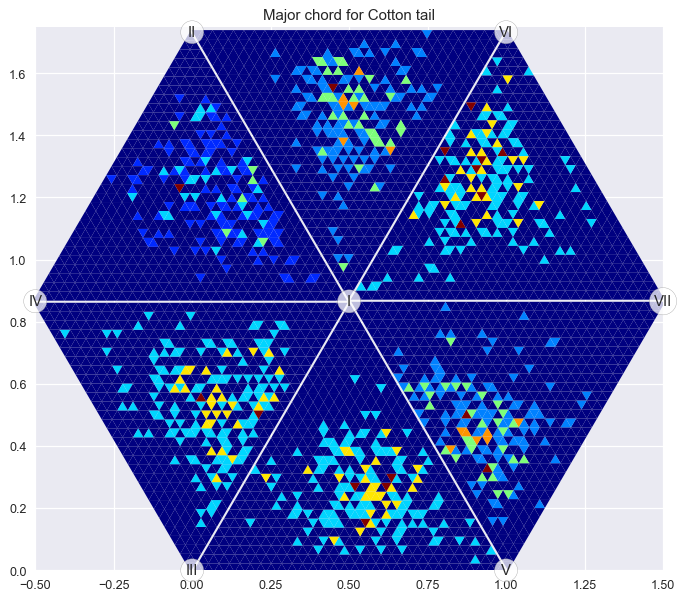

In [74]:
dinah = chromaEvaluator.loadChromasForAnnotationFile('annotations/cotton_tail.json')
dinahMaj = preprocessing.normalize(dinah.chromas[dinah.kinds == 'maj'], norm='l1')
dFrame = pd.DataFrame(dinahMaj,  columns=degrees)
fig, ax = plt.subplots(figsize=(9, 8), dpi= 90, facecolor='w', edgecolor='k')
ax.set_title("Major chord for Cotton tail")
plots.plotHexagram(ax, dinahMaj)
plt.show()

### Hexagram for major chord on the whole dataset

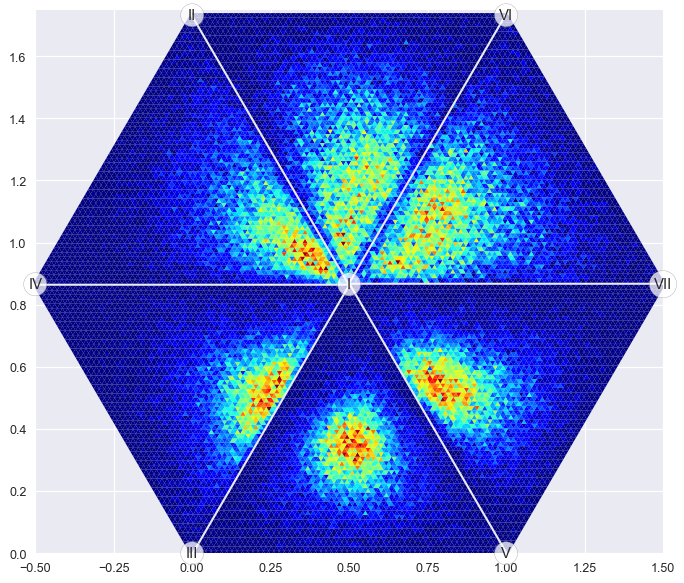

In [59]:
cep = ll.ChromaEvaluationParameters(stepSize=2048, smoothingTime=1.2)
chromaEvaluator = ll.AnnotatedChromaEvaluator(cep)
chromas = chromaEvaluator.loadChromasForAnnotationFileList('ready.txt')
dMaj = pd.DataFrame(data=preprocessing.normalize(chromas.chromas[chromas.kinds == 'maj'], norm='l1'),  columns=degrees)
maj = preprocessing.normalize(chromas.chromas[chromas.kinds == 'maj'], norm='l1')
fig, ax = plt.subplots(figsize=(9, 8), dpi= 90, facecolor='w', edgecolor='k')
plots.plotHexagram(ax, maj, 60)
plt.show()